
# **CSMODEL MCO PHASE 1**
**S15 - Group 9**


*   Feliciano, Jan Robee
*   Roque, Dominic Angelo
*   Ty, Darryl Johnson
*   Valdellon, Derrick



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

vg_sales_df = pd.read_csv('/content/drive/MyDrive/CSMODEL/Datasets/Video_Game_Sales.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vg_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


# Dataset Description

**Video Game Sales and Ratings Dataset**

link to dataset: [VG Sales and Ratings | Kaggle ](https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings/data)

This dataset contains a list of video games with sales greater than 100,000 copies along with critic and user ratings, Sales per region, and ESRB rating. The data is accurate as of January 2017. The dataset contains a total of 17416 entries/observations




**Collection Method**

Data was collected through a combined web scrape from VGChartz and Metacritic along with manually entered year of release values for most games with a missing year of release. The original code was created by Rush Kirubi, but it limited the data to only include a subset of video game platforms. Not all of the listed video games have information on Metacritic, so there are some rows that have missing values.

**Structure**

The Dataset consists of one (1) csv file that contains 15 columns for each variable. Each row represents 1 video game and its details.

Variables include in the dataset:

*   Name - The game's name
*   Platform - Platform of the games release
*   Year_of_Release - Year of the game's release
*   Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales (in millions)
* Critic_score - Aggregate score compiled by Metacritic staff
* Critic_count - The number of critics used in coming up with the critic score
* User_score - Score by Metacritic's subscribers
* User_count - Number of users who gave the user score
* Rating - The ESRB ratings (age rating)

# Data Cleaning

Dataset info:

In [ ]:
vg_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


##Name Variable

Let's first look at the **'Name'** Variable. Checking the unique value counts:

In [ ]:
vg_sales_df['Name'].value_counts()

Name
Need for Speed: Most Wanted      12
Madden NFL 07                     9
Madden NFL 08                     9
FIFA 14                           9
LEGO Marvel Super Heroes          9
                                 ..
Full Auto                         1
Sailor Moon                       1
Herdy Gerdy                       1
Pass the Pigs                     1
Brian Lara 2007 Pressure Play     1
Name: count, Length: 12080, dtype: int64

As shown above there are multiple entries for the same game, and this happens for multiple games. To check the reason for this let's check each entree for the game that has the most entries.

In [ ]:
df = vg_sales_df[vg_sales_df['Name'] == 'Need for Speed: Most Wanted']
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
259,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,138.0,T
529,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN
1198,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.4,135.0,T
1601,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.4,135.0,T
2007,Need for Speed: Most Wanted,X,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,T


Looking at The Dataframe, there are two reasons for the duplicate entries.
* There is a different entry for each different platform
* Games with the same name but released in different years (i.e. remasters)

Since these games are usually counted as seperate games with different amount of sales per platform, we decided to keep the duplicates of each game as is.

##Platform Variable

Next let's look at the **'Platform'** variable:

In [ ]:
vg_sales_df['Platform'].unique()

array(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
vg_sales_df['Platform'].value_counts()

Platform
DS      2251
PS2     2206
PS3     1362
Wii     1359
PSP     1304
X360    1298
PS      1200
PC      1128
GBA      844
X        833
GC       563
3DS      553
PSV      503
PS4      424
N64      319
XOne     264
SNES     239
SAT      173
WiiU     153
2600     133
NES       98
G         98
DC        52
GEN       27
NG        12
WS         7
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

To make it easier to understand, we will replace the ambigious acronyms with the full console name.

In [ ]:
vg_sales_df['Platform'] = vg_sales_df['Platform'].replace({'X360':'Xbox 360', 'PS': 'Playstation', 'X': 'Xbox', 'GC': 'GameCube',
                                                          'PSV': 'Playstation Vita', 'XOne': 'Xbox One', 'SAT': 'Sega Saturn', '2600': 'Atari 2600',
                                                           'G': 'GameBoy', 'DC': 'Dreamcast', 'GEN': 'Sega Genesis', 'NG': 'Neo Geo', 'WS': 'WonderSwan',
                                                           'SCD': 'Sega CD', 'GG':'Game Gear'})

In [ ]:
vg_sales_df['Platform'].value_counts()

Platform
DS                  2251
PS2                 2206
PS3                 1362
Wii                 1359
PSP                 1304
Xbox 360            1298
Playstation         1200
PC                  1128
GBA                  844
Xbox                 833
GameCube             563
3DS                  553
Playstation Vita     503
PS4                  424
N64                  319
Xbox One             264
SNES                 239
Sega Saturn          173
WiiU                 153
Atari 2600           133
NES                   98
GameBoy               98
Dreamcast             52
Sega Genesis          27
Neo Geo               12
WonderSwan             7
Sega CD                6
3DO                    3
TG16                   2
Game Gear              1
PCFX                   1
Name: count, dtype: int64

##Genre Variable

Next is the **'Genre'** Variable

In [ ]:
vg_sales_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
vg_sales_df['Genre'].value_counts()

Genre
Action          3503
Sports          2408
Misc            1813
Role-Playing    1545
Adventure       1478
Shooter         1349
Racing          1282
Simulation       925
Platform         900
Fighting         864
Strategy         734
Puzzle           615
Name: count, dtype: int64

All the values of the genre value are valid genres with no discrepencies seen so we move on

##Year Variable

Lets now look at the **'Year_of_Release'** variable:

In [ ]:
vg_sales_df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2015.,
       2011., 1998., 2012., 2014., 2016., 1992., 1997., 1993., 1994.,
       1982., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1978., 1977., 1976., 1979.,   nan, 2017.])

all the years listed are valid years with no typos or errors, other than the nan value. we will deal with that later. We will now move on to the **'Rating'** variable

##Rating Variable

In [ ]:
vg_sales_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Same with the **'Year_of_Release'** variable, all the listed ratings are valid with no typos or errors other than the nan value

##NaN Values

The rest of the variables are float values (The different sales & scores), or in the case of the 'Publisher' variable, strings that represent company names. We will now deal with the NaN values

In [ ]:
vg_sales_df.isnull().any()

Name               False
Platform           False
Year_of_Release     True
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating              True
dtype: bool

In [ ]:
nan_variables = vg_sales_df.columns[vg_sales_df.isnull().any()].tolist()
print(nan_variables)

['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']


In [ ]:
vg_sales_df[nan_variables].isnull().sum()

Year_of_Release       8
Publisher             1
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

Let's start with the 'Year_of_Release' and 'Publisher' variables. We can see that the NaN values for each are only 8 and 1 respectively, which is very minimal compared to the total number of observations, 17416. Because that is the case, we will drop the rows containing the NaN values.

In [ ]:
var_to_drop = ['Year_of_Release', 'Publisher']
vg_sales_df = vg_sales_df.dropna(subset = var_to_drop)

In [ ]:
vg_sales_df[nan_variables].isnull().sum()

Year_of_Release       0
Publisher             0
Critic_Score       9073
Critic_Count       9073
User_Score         9610
User_Count         9610
Rating             7158
dtype: int64

In [ ]:
vg_sales_df.shape

(17408, 15)

The cause for the missing values in the Rating, scores, and counts variables, as stated in the description, are because they lack information on Metacritic. Since the number is substantial, we will replace these NaN with a setinel value.

The sentinel value for Rating will be set to the string "None", while the value for the user/critic score and count variables will be set to -1.

In [ ]:
vg_sales_df.loc[vg_sales_df['Rating'].isnull(), 'Rating'] = "None"
vg_sales_df['Critic_Score'] = vg_sales_df['Critic_Score'].fillna(-1)
vg_sales_df['Critic_Count'] = vg_sales_df['Critic_Count'].fillna(-1)
vg_sales_df['User_Score'] = vg_sales_df['User_Score'].fillna(-1)
vg_sales_df['User_Count'] = vg_sales_df['User_Count'].fillna(-1)

vg_sales_df[nan_variables].isnull().sum()

Year_of_Release    0
Publisher          0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

In [ ]:
vg_sales_df.shape

(17408, 15)

In [ ]:
vg_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,-1.0,-1.0,None
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,GameBoy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1.0,-1.0,-1.0,-1.0,None


# Exploratory Data Analysis

##Which video game genre has the highest average sales?


To answer this question, the variables of interest are:
- **`genre`**: genre of the game
- **`NA_Sales`**: Sales in North America (in millions)
- **`EU_Sales`**: Sales in Europe (in millions)
- **`JP_Sales`**: Sales in Japan (in millions)
- **`Other_Sales`**: Sales in the rest of the world (in millions)
- **`Global_Sales`**: Total worldwide sales (in millions)

###By Sales in North America

To answer this question, the variables of interest are:
- **`Genre`**: genre of the game
- **`NA_Sales`**: Sales in North America (in millions)

Let us first group by genre then get the measure of central tendency and measure of dispersion


In [ ]:
genre_NA_sales_df = vg_sales_df.groupby('Genre').agg({'NA_Sales': ['mean', 'std']})
genre_NA_sales_df.sort_values(('NA_Sales', 'mean'), ascending=False)

NA_Sales          
                  mean       std
Genre                           
Platform      0.496489  1.488274
Shooter       0.445111  1.195598
Sports        0.286082  1.026434
Racing        0.281429  0.733220
Fighting      0.259410  0.512052
Action        0.252949  0.555998
Misc          0.226164  0.677563
Role-Playing  0.217955  0.674974
Puzzle        0.200228  1.029556
Simulation    0.197716  0.453555
Strategy      0.093910  0.288893
Adventure     0.071888  0.257399

Let us visualize the means of the NA Sales across different genres for comparison.

Text(0.5, 1.0, 'Mean NA Sales per Genre')

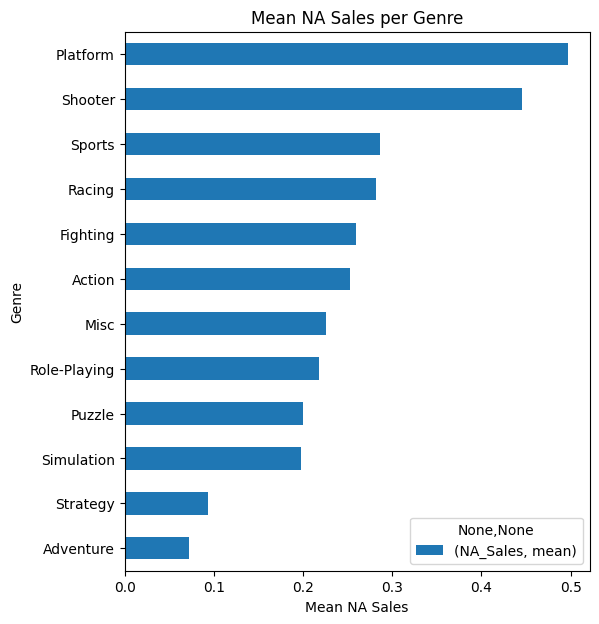

In [ ]:
genre_NA_sales_mean_df = vg_sales_df.groupby('Genre').agg({'NA_Sales': ['mean']})
genre_NA_sales_mean_df.sort_values(('NA_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean NA Sales')
plt.ylabel('Genre')
plt.title('Mean NA Sales per Genre')

Here, we can infer that the **Platform, Shooter, and Sports** video game genres have the highest sales on average in North America.

###By Sales in Europe

To answer this question, the variables of interest are:
- **`Genre`**: genre of the game
- **`EU_Sales`**: Sales in Europe (in millions)

Let us first group by genre then get the measure of central tendency and measure of dispersion


In [ ]:
genre_EU_sales_df = vg_sales_df.groupby('Genre').agg({'EU_Sales': ['mean', 'std']})
genre_EU_sales_df.sort_values(('EU_Sales', 'mean'), ascending=False)

EU_Sales          
                  mean       std
Genre                           
Shooter       0.238739  0.553252
Platform      0.224300  0.582426
Racing        0.185472  0.573461
Sports        0.157939  0.773814
Action        0.150089  0.400705
Role-Playing  0.125249  0.488945
Simulation    0.124394  0.499759
Misc          0.118455  0.435230
Fighting      0.116597  0.250794
Puzzle        0.081659  0.308519
Strategy      0.062207  0.186192
Adventure     0.043593  0.165428

Let us visualize the means of the EU Sales across different genres for comparison.

Text(0.5, 1.0, 'Mean EU Sales per Genre')

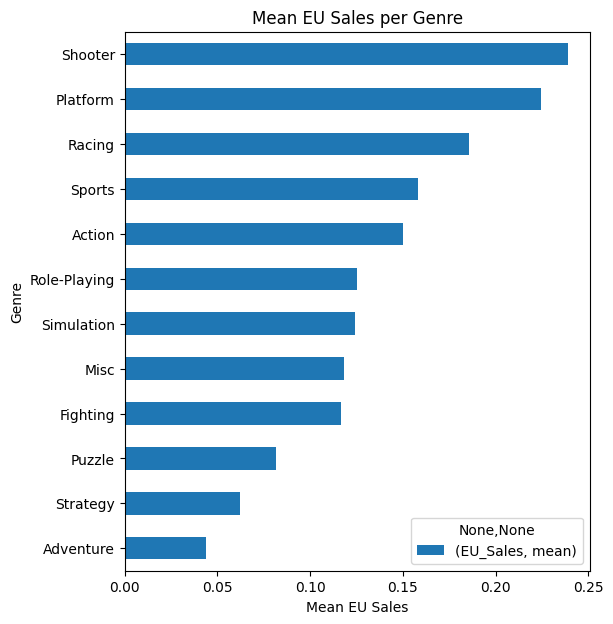

In [ ]:
genre_EU_sales_mean_df = vg_sales_df.groupby('Genre').agg({'EU_Sales': ['mean']})
genre_EU_sales_mean_df.sort_values(('EU_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean EU Sales')
plt.ylabel('Genre')
plt.title('Mean EU Sales per Genre')

Here, we can infer that the **Shooter, Platform, and Racing** video game genres have the highest sales on average in Europe.

###By Sales in Japan

To answer this question, the variables of interest are:
- **`Genre`**: genre of the game
- **`JP_Sales`**: Sales in Japan (in millions)

Let us first group by genre then get the measure of central tendency and measure of dispersion


In [ ]:
genre_JP_sales_df = vg_sales_df.groupby('Genre').agg({'JP_Sales': ['mean', 'std']})
genre_JP_sales_df.sort_values(('JP_Sales', 'mean'), ascending=False)

JP_Sales          
                  mean       std
Genre                           
Role-Playing  0.231728  0.640613
Platform      0.145967  0.521726
Fighting      0.101713  0.257036
Puzzle        0.093317  0.355473
Simulation    0.069329  0.295741
Strategy      0.067943  0.166181
Misc          0.059967  0.241072
Sports        0.056419  0.220993
Action        0.046734  0.161439
Racing        0.044372  0.263718
Adventure     0.036468  0.112493
Shooter       0.028932  0.101751

Let us visualize the means of the JP Sales across different genres for comparison.

Text(0.5, 1.0, 'Mean JP Sales per Genre')

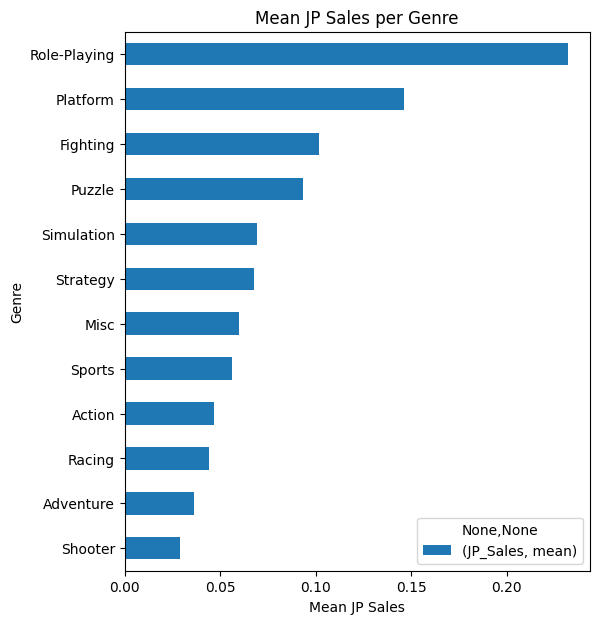

In [ ]:
genre_JP_sales_mean_df = vg_sales_df.groupby('Genre').agg({'JP_Sales': ['mean']})
genre_JP_sales_mean_df.sort_values(('JP_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean JP Sales')
plt.ylabel('Genre')
plt.title('Mean JP Sales per Genre')

Here, we can infer that the **Role-Playing, Platform, and Fighting** video game genres have the highest sales on average in Japan.

###By Sales in Other Regions

To answer this question, the variables of interest are:
- **`Genre`**: genre of the game
- **`Other_Sales`**: Sales in the rest of the world (in millions)

Let us first group by genre then get the measure of central tendency and measure of dispersion


In [ ]:
genre_Other_sales_df = vg_sales_df.groupby('Genre').agg({'Other_Sales': ['mean', 'std']})
genre_Other_sales_df.sort_values(('Other_Sales', 'mean'), ascending=False)

Other_Sales          
                    mean       std
Genre                             
Shooter         0.078657  0.200220
Racing          0.059625  0.267011
Platform        0.057089  0.163921
Sports          0.056377  0.239505
Action          0.053303  0.232385
Fighting        0.042257  0.103875
Misc            0.041341  0.140613
Role-Playing    0.039553  0.125000
Simulation      0.033398  0.111986
Puzzle          0.020163  0.068857
Strategy        0.014905  0.039109
Adventure       0.011340  0.041350


Let us visualize the means of the Sales in other Regions across different genres for comparison.

Text(0.5, 1.0, 'Mean Sales in Other Regions per Genre')

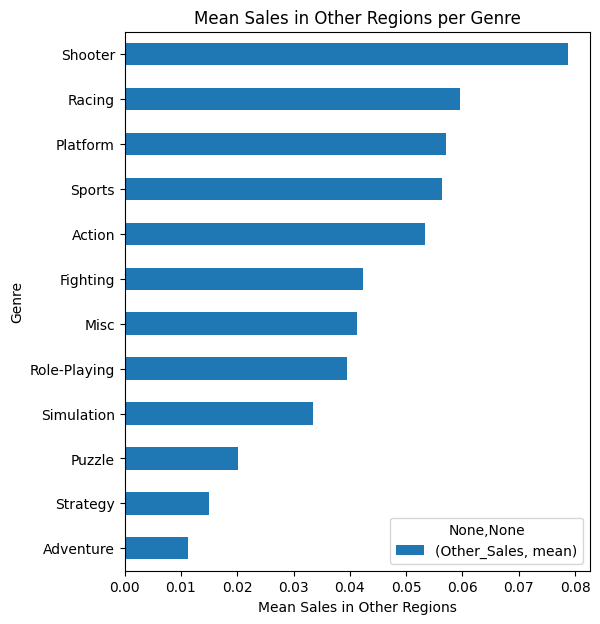

In [ ]:
genre_Other_sales_mean_df = vg_sales_df.groupby('Genre').agg({'Other_Sales': ['mean']})
genre_Other_sales_mean_df.sort_values(('Other_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean Sales in Other Regions')
plt.ylabel('Genre')
plt.title('Mean Sales in Other Regions per Genre')

Here, we can infer that the **Shooter, Racing, and Platform** video game genres have the highest sales on average in the rest of the world.

###By Worldwide Sales

To answer this question, the variables of interest are:
- **`Genre`**: genre of the game
- **`Global_Sales`**: Total worldwide sales (in millions)

Let us first group by genre then get the measure of central tendency and measure of dispersion


In [ ]:
genre_Global_sales_df = vg_sales_df.groupby('Genre').agg({'Global_Sales': ['mean', 'std']})
genre_Global_sales_df.sort_values(('Global_Sales', 'mean'), ascending=False)

Global_Sales          
                     mean       std
Genre                              
Platform         0.924156  2.561334
Shooter          0.791751  1.818524
Role-Playing     0.614440  1.707552
Racing           0.571155  1.642292
Sports           0.557121  2.063962
Fighting         0.519873  0.948012
Action           0.503397  1.133074
Misc             0.446347  1.287351
Simulation       0.425087  1.160932
Puzzle           0.396358  1.520305
Strategy         0.239401  0.504786
Adventure        0.163430  0.481517

Let us visualize the means of the Worldwide Sales across different genres for comparison.

Text(0.5, 1.0, 'Mean Worldwide Sales per Genre')

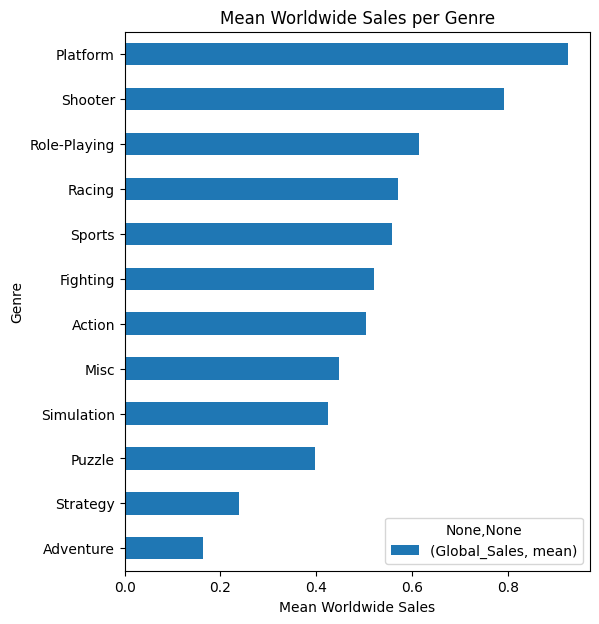

In [ ]:
genre_Global_sales_mean_df = vg_sales_df.groupby('Genre').agg({'Global_Sales': ['mean']})
genre_Global_sales_mean_df.sort_values(('Global_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean Worldwide Sales')
plt.ylabel('Genre')
plt.title('Mean Worldwide Sales per Genre')

Here, we can infer that the **Platform, Shooter, and Role-Playing** video game genres have the highest sales on average Worldwide.

## Is there a relationship between global sales, critic score, and user score?






To answer this question, the variables of interest are:


- **`Global_Sales`**: Total worldwide sales (in millions)
- **`Critic_Score`**: Aggregate score compiled by Metacritic staff
- **`User_Score`**: Score by Metacritic's subscribers



Let us get the different values of these variables for each video game.

In [ ]:
global_critic_user = vg_sales_df[['Global_Sales', 'Critic_Score', 'User_Score']]
global_critic_user

,Global_Sales,Critic_Score,User_Score
0,82.54,76.0,8.0
1,40.24,-1.0,-1.0
2,35.57,82.0,8.3
3,32.78,80.0,8.0
4,31.37,-1.0,-1.0
...,...,...,...
17411,0.01,64.0,-1.0
17412,0.01,-1.0,-1.0
17413,0.01,-1.0,-1.0
17414,0.01,-1.0,-1.0


Let us clean this dataset by removing rows with a sentinel value of (-1) in the critic and user scores.

In [ ]:
global_critic_user_clean = global_critic_user[~((global_critic_user['Critic_Score'] == -1.0) | (global_critic_user['User_Score'] == -1.0))]
global_critic_user_clean

,Global_Sales,Critic_Score,User_Score
0,82.54,76.0,8.0
2,35.57,82.0,8.3
3,32.78,80.0,8.0
6,29.81,89.0,8.5
7,28.92,58.0,6.6
...,...,...,...
17394,0.01,91.0,8.5
17401,0.01,60.0,4.9
17402,0.01,68.0,6.5
17404,0.01,67.0,6.9


Let us also remove a row that contains an outlier of 80 million global sales since the most of the data is far from that range.

In [ ]:
global_critic_user_clean = global_critic_user_clean[global_critic_user_clean['Global_Sales'] <= 50]
global_critic_user_clean

,Global_Sales,Critic_Score,User_Score
2,35.57,82.0,8.3
3,32.78,80.0,8.0
6,29.81,89.0,8.5
7,28.92,58.0,6.6
8,28.38,87.0,8.4
...,...,...,...
17394,0.01,91.0,8.5
17401,0.01,60.0,4.9
17402,0.01,68.0,6.5
17404,0.01,67.0,6.9


### Global Sales vs Critic Score

To answer this question, the variables of interest are:
- **`Global_Sales`**: Total worldwide sales (in millions)
- **`Critic_Score`**: Aggregate score compiled by Metacritic staff

Let us visualize the correlation between global sales, critic score, and user score.

Text(0, 0.5, 'Global Sales (in millions)')

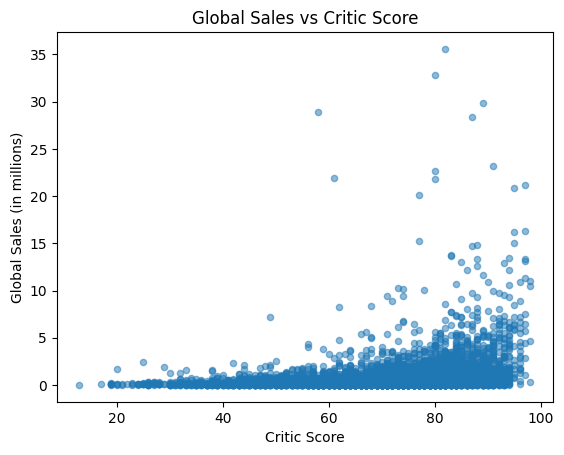

In [ ]:
global_critic_user_clean.plot.scatter(y='Global_Sales', x='Critic_Score', alpha=0.5)
plt.title('Global Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')

### Global Sales vs User Score

To answer this question, the variables of interest are:
- **`Global_Sales`**: Total worldwide sales (in millions)
- **`User_Score`**: Score by Metacritic's subscribers

Text(0, 0.5, 'Global Sales (in millions)')

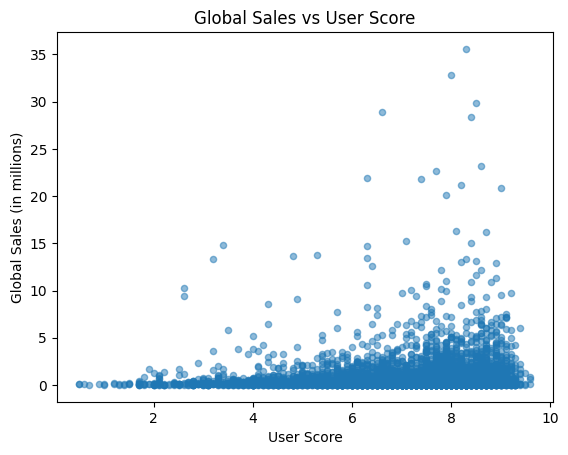

In [ ]:
global_critic_user_clean.plot.scatter(y='Global_Sales', x='User_Score', alpha=0.5)
plt.title('Global Sales vs User Score')
plt.xlabel('User Score')
plt.ylabel('Global Sales (in millions)')

Let us now get the Pearson R value for both

In [ ]:
critic_corr, _ = pearsonr(global_critic_user_clean['Critic_Score'], global_critic_user_clean['Global_Sales'])
user_corr, _ = pearsonr(global_critic_user_clean['User_Score'], global_critic_user_clean['Global_Sales'])
print(f'Correlation between Global Sales and Critic Score: {critic_corr}')
print(f'Correlation between Global Sales and User Score: {user_corr}')

Correlation between Global Sales and Critic Score: 0.2706848558000649
Correlation between Global Sales and User Score: 0.09799246820655608


Here, we can infer that Global Sales and Critic Score has a **weak** correlation while Global Sales and User Score has a **very weak** correlation.

##Which video game platform has the highest average sales in North America, Europe, and Japan?

To answer this question, the variables of interest are:
- **`Platform`**: Platform of the games release
- **`NA_Sales`**: Sales in North America (in millions)
- **`EU_Sales`**: Sales in Europe (in millions)
- **`JP_Sales`**: Sales in Japan (in millions)

###By Sales in North America

To answer this question, the variables of interest are:

- **`Platform`**: Platform of the games release
- **`NA_Sales`**: Sales in North America (in millions)



Let us first group by platform then get the measure of central tendancy and measure of dispersion

In [ ]:
platform_NA_sales_df = vg_sales_df.groupby('Platform').agg({'NA_Sales': ['mean', 'std']})
platform_NA_sales_df.sort_values(('NA_Sales', 'mean'), ascending=False)

NA_Sales          
                      mean       std
Platform                            
NES               1.285102  4.080581
GameBoy           1.166531  3.018756
Sega Genesis      0.713704  1.113132
Atari 2600        0.681203  0.854741
Xbox 360          0.466083  1.024798
N64               0.435799  0.797725
Xbox One          0.390114  0.650946
Wii               0.366794  1.508222
PS3               0.289853  0.574273
PS4               0.280495  0.594975
Playstation       0.280442  0.534343
PS2               0.264660  0.575226
WiiU              0.257255  0.492172
SNES              0.256192  1.052137
GameCube          0.237176  0.421399
Xbox              0.224202  0.399758
GBA               0.222310  0.438758
DS                0.170405  0.523219
Sega CD           0.166667  0.408248
3DS               0.158318  0.555450
Dreamcast         0.104423  0.311979
PC                0.084734  0.330009
PSP               0.084094  0.199272
Playstation Vita  0.025857  0.070741
Sega Saturn       0.004162  0.032850
PCFX              0.000000       NaN
Game Gear         0.000000       NaN
TG16              0.000000  0.000000
Neo Geo           0.000000  0.000000
WonderSwan        0.000000  0.000000
3DO               0.000000  0.000000

Let us visualize the means of NA sales across different platfomrs for comparison

Text(0.5, 1.0, 'Mean NA Sales per Platform')

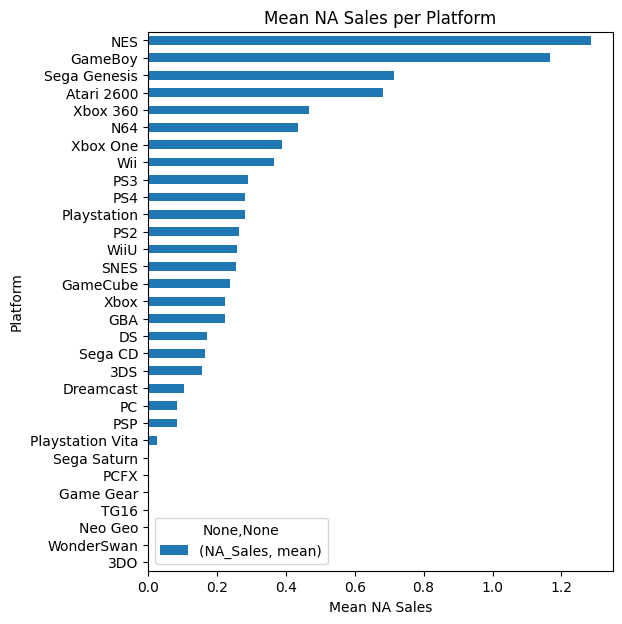

In [ ]:
platform_NA_sales_mean_df = vg_sales_df.groupby('Platform').agg({'NA_Sales': ['mean']})
platform_NA_sales_mean_df.sort_values(('NA_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean NA Sales')
plt.ylabel('Platform')
plt.title('Mean NA Sales per Platform')

Here, we can infer that the **NES**, **GameBoy**, and **Sega Gensis** platforms have the highest sales on average in North America.

###By Sales in Europe

To answer this question, the variables of interest are:

- **`Platform`**: Platform of the games release
- **`EU_Sales`**: Sales in Europe (in millions)


Let us first group by platform then get the measure of central tendency and measure of dispersion

In [ ]:
platform_EU_sales_df = vg_sales_df.groupby('Platform').agg({'EU_Sales': ['mean', 'std']})
platform_EU_sales_df.sort_values(('EU_Sales', 'mean'), ascending=False)

EU_Sales          
                      mean       std
Platform                            
GameBoy           0.487959  1.247071
PS4               0.356769  0.831290
PS3               0.243510  0.584377
NES               0.215816  0.521698
Xbox 360          0.209715  0.471957
Xbox One          0.207159  0.372309
Sega Genesis      0.204444  0.317845
Wii               0.193920  1.061614
Playstation       0.178008  0.370061
WiiU              0.171895  0.300799
PS2               0.153803  0.358575
PC                0.128963  0.377823
N64               0.128715  0.294827
3DS               0.119150  0.428450
GBA               0.089159  0.225027
DS                0.084175  0.483496
SNES              0.079665  0.335919
Xbox              0.073181  0.132473
GameCube          0.068757  0.142006
Sega CD           0.060000  0.146969
PSP               0.051321  0.175450
Atari 2600        0.041128  0.052867
Dreamcast         0.032500  0.116550
Playstation Vita  0.027610  0.081335
Sega Saturn       0.003121  0.024815
WonderSwan        0.000000  0.000000
Game Gear         0.000000       NaN
TG16              0.000000  0.000000
PCFX              0.000000       NaN
Neo Geo           0.000000  0.000000
3DO               0.000000  0.000000

Let us visualize the means of the EU Sales across different platforms for comparison.

Text(0.5, 1.0, 'Mean EU Sales per Platform')

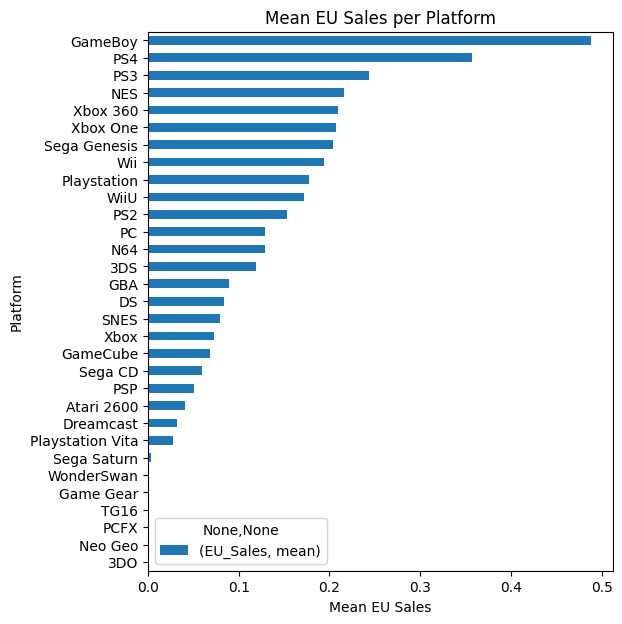

In [ ]:
platform_NA_sales_mean_df = vg_sales_df.groupby('Platform').agg({'EU_Sales': ['mean']})
platform_NA_sales_mean_df.sort_values(('EU_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean EU Sales')
plt.ylabel('Platform')
plt.title('Mean EU Sales per Platform')

Here, we can infer that the **GameBoy**, **PS4**, and **PS3** platforms have the highest sales on Average in Europe.

###By Sales in Japan

To answer this question, the variables of interest are:

- **`Platform`**: Platform of the games release
- **`JP_Sales`**: Sales in Japan (in millions)


Let us first group by platform then get the measure of central tendency and measure of dispersion

Text(0.5, 1.0, 'Mean JP Sales per Platform')

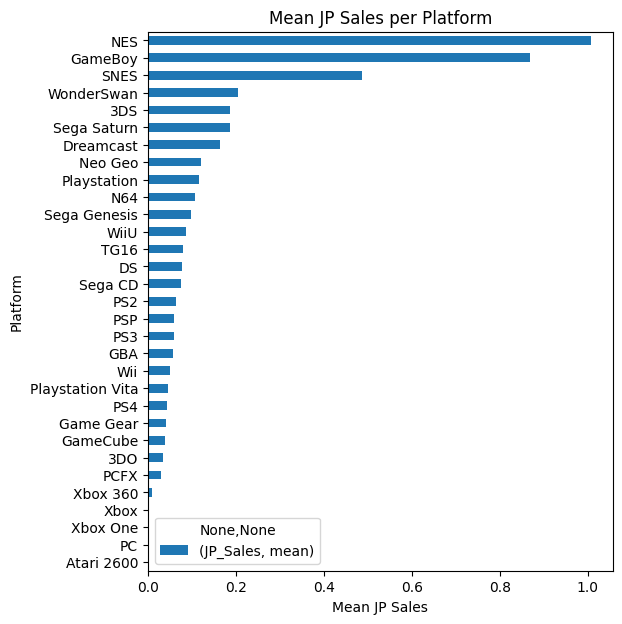

In [88]:
platform_JP_sales_mean_df = vg_sales_df.groupby('Platform').agg({'JP_Sales': ['mean']})
platform_JP_sales_mean_df.sort_values(('JP_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean JP Sales')
plt.ylabel('Platform')
plt.title('Mean JP Sales per Platform')

Here, we can infer that the **NES**, **GameBoy**, and **SNES** platforms have the highest sales on Average in Japan.

##Which year of release has the highest average video game sales in the last five years before 2017?

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`NA_Sales`**: Sales in North America (in millions)
- **`EU_Sales`**: Sales in Europe (in millions)
- **`JP_Sales`**: Sales in Japan (in millions)
- **`Other_Sales`**: Sales in the rest of the world (in millions)
- **`Global_Sales`**: Total worldwide sales (in millions)

Let us first identify the last five years within the dataset.

In [ ]:
last_5_years = vg_sales_df['Year_of_Release'].dropna().unique()
years = sorted(last_5_years, reverse=True)[:5]
years

[2017.0, 2016.0, 2015.0, 2014.0, 2013.0]

Then, we will filter the dataset based on these years

In [ ]:
last_5_years_filtered_df = vg_sales_df[vg_sales_df['Year_of_Release'].isin(years)]
last_5_years_filtered_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.14,0.98,3.97,21.12,97.0,50.0,8.2,4009.0,M
23,Grand Theft Auto V,Xbox 360,2013.0,Action,Take-Two Interactive,9.66,5.17,0.06,1.41,16.30,97.0,58.0,8.1,3722.0,M
29,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.39,4.37,4.36,0.80,14.92,-1.0,-1.0,-1.0,-1.0,None
30,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.08,5.95,0.36,2.41,14.80,-1.0,-1.0,-1.0,-1.0,None
37,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,4.12,6.77,0.39,2.08,13.36,97.0,66.0,8.3,2955.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17387,Regular Show: Mordecai & Rigby in 8-Bit Land,3DS,2013.0,Action,Namco Bandai Games,0.00,0.00,0.00,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17395,Elixir of Imortality,PC,2015.0,Misc,Big Fish Games,0.00,0.00,0.00,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17405,Rear Pheles: Red of Another,Playstation Vita,2015.0,Action,Unknown,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17406,Caladrius Blaze,PS3,2014.0,Shooter,Moss,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None


To verify, let us check the number of observations per year in our filtered dataset.

In [ ]:
last_5_years_filtered_df['Year_of_Release'].value_counts()

Year_of_Release
2015.0    657
2014.0    635
2016.0    618
2013.0    577
2017.0      5
Name: count, dtype: int64

Here, we can observe that there are **too few observations** logged in the year 2017. Therefore, let us now filter the dataset to instead contain the last 5 years preceding 2017. First, we will identify the most recent year.

In [ ]:
years = vg_sales_df['Year_of_Release'].dropna().unique()
years = sorted(years, reverse=True)
years

[2017.0,
 2016.0,
 2015.0,
 2014.0,
 2013.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2005.0,
 2004.0,
 2003.0,
 2002.0,
 2001.0,
 2000.0,
 1999.0,
 1998.0,
 1997.0,
 1996.0,
 1995.0,
 1994.0,
 1993.0,
 1992.0,
 1991.0,
 1990.0,
 1989.0,
 1988.0,
 1987.0,
 1986.0,
 1985.0,
 1984.0,
 1983.0,
 1982.0,
 1981.0,
 1980.0,
 1979.0,
 1978.0,
 1977.0,
 1976.0]

Next, we will select the five years preceding the most recent year

In [ ]:
if len(years) > 1:
  recent_years = years[1:6]
else:
  recent_years = []

recent_years

[2016.0, 2015.0, 2014.0, 2013.0, 2012.0]

Now that we have the years preceding the most recent year, we will now filter the dataset once again to only contain observations from these years.

In [ ]:
last_5_years_filtered_df = vg_sales_df[vg_sales_df['Year_of_Release'].isin(recent_years)]
last_5_years_filtered_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.14,0.98,3.97,21.12,97.0,50.0,8.2,4009.0,M
23,Grand Theft Auto V,Xbox 360,2013.0,Action,Take-Two Interactive,9.66,5.17,0.06,1.41,16.30,97.0,58.0,8.1,3722.0,M
29,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.39,4.37,4.36,0.80,14.92,-1.0,-1.0,-1.0,-1.0,None
30,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.08,5.95,0.36,2.41,14.80,-1.0,-1.0,-1.0,-1.0,None
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,921.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17388,Jewel Quest 6: The Sapphire Dragon,PC,2012.0,Puzzle,Avanquest Software,0.00,0.00,0.00,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17395,Elixir of Imortality,PC,2015.0,Misc,Big Fish Games,0.00,0.00,0.00,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17405,Rear Pheles: Red of Another,Playstation Vita,2015.0,Action,Unknown,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None
17406,Caladrius Blaze,PS3,2014.0,Shooter,Moss,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,-1.0,-1.0,None


We could also verify the number of observations per year in our filtered dataset again.

In [ ]:
last_5_years_filtered_df['Year_of_Release'].value_counts()

Year_of_Release
2012.0    689
2015.0    657
2014.0    635
2016.0    618
2013.0    577
Name: count, dtype: int64

###By Sales in North America

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`NA_Sales`**: Sales in North America (in millions)

Let us first group by year of then get the measure of central tendency and measure of dispersion

In [ ]:
year_of_release_NA_sales_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'NA_Sales': ['mean', 'std']})
year_of_release_NA_sales_df.sort_values(('NA_Sales', 'mean'), ascending=False)

NA_Sales          
                     mean       std
Year_of_Release                    
2013.0           0.268458  0.761242
2012.0           0.223338  0.613290
2014.0           0.212898  0.507662
2015.0           0.170107  0.481145
2016.0           0.104223  0.343118

Let us visualize the means of the NA Sales across the years of release for comparison.

Text(0.5, 1.0, 'Mean NA Sales per Year of Release')

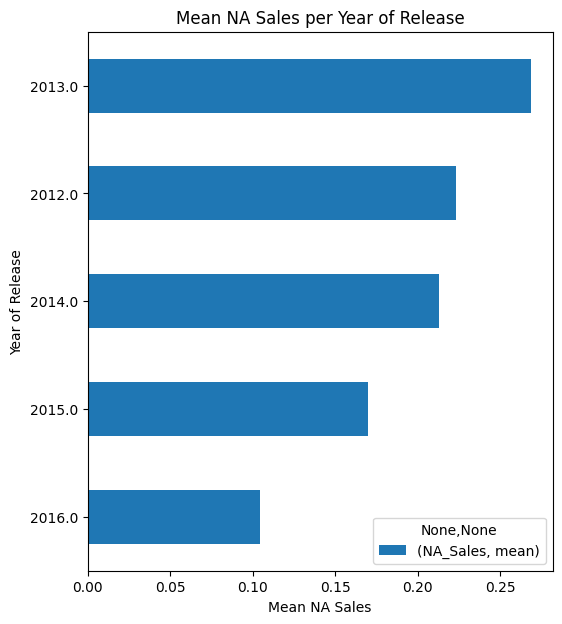

In [ ]:
year_of_release_NA_sales_mean_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'NA_Sales': ['mean']})
year_of_release_NA_sales_mean_df.sort_values(('NA_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean NA Sales')
plt.ylabel('Year of Release')
plt.title('Mean NA Sales per Year of Release')

Here, we can infer that **2013, 2012, and 2014** had the highest sales on average in North America.

What is interesting to note here is that 2016 had the lowest standard deviation but the lowest mean sales. This suggests that video game sales in that year did not fluctuate much and were generally at a lower level compared to other years. Let us see if this trend holds up in the other regional metrics.


###By Sales in Europe

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`EU_Sales`**: Sales in Europe (in millions)

Let us first group by year of then get the measure of central tendency and measure of dispersion

In [ ]:
year_of_release_EU_sales_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'EU_Sales': ['mean', 'std']})
year_of_release_EU_sales_df.sort_values(('EU_Sales', 'mean'), ascending=False)

EU_Sales          
                     mean       std
Year_of_Release                    
2013.0           0.214177  0.620902
2014.0           0.197228  0.519713
2012.0           0.167591  0.472026
2015.0           0.152085  0.473119
2016.0           0.108997  0.401362

Let us visualize the means of the EU Sales across the years of release for
comparison.

Text(0.5, 1.0, 'Mean EU Sales per Year of Release')

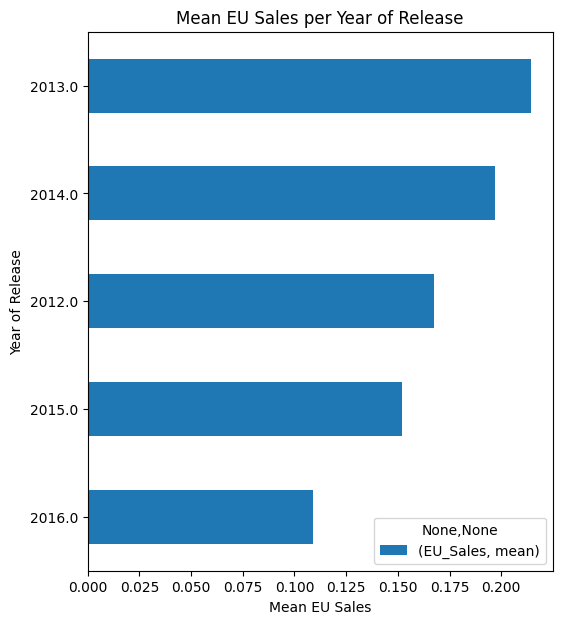

In [ ]:
year_of_release_EU_sales_mean_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'EU_Sales': ['mean']})
year_of_release_EU_sales_mean_df.sort_values(('EU_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean EU Sales')
plt.ylabel('Year of Release')
plt.title('Mean EU Sales per Year of Release')

Here, we can infer that **2013, 2014, and 201** had the highest sales on average in Europe.

###By Sales in Japan

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`JP_Sales`**: Sales in Japan (in millions)

Let us first group by year of then get the measure of central tendency and measure of dispersion

In [ ]:
year_of_release_JP_sales_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'JP_Sales': ['mean', 'std']})
year_of_release_JP_sales_df.sort_values(('JP_Sales', 'mean'), ascending=False)

JP_Sales          
                     mean       std
Year_of_Release                    
2013.0           0.083588  0.284552
2012.0           0.075776  0.260715
2014.0           0.063559  0.265896
2015.0           0.053379  0.184438
2016.0           0.039385  0.146883

Let us visualize the means of the JP Sales across the years of release for
comparison.

Text(0.5, 1.0, 'Mean JP Sales per Year of Release')

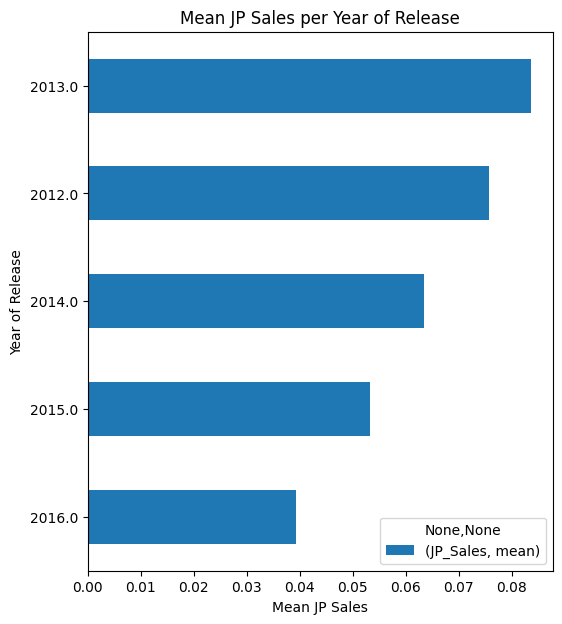

In [ ]:
year_of_release_JP_sales_mean_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'JP_Sales': ['mean']})
year_of_release_JP_sales_mean_df.sort_values(('JP_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean JP Sales')
plt.ylabel('Year of Release')
plt.title('Mean JP Sales per Year of Release')

Here, we can infer that **2013, 2012, and 2014** had the highest sales on average in Japan.

###By Sales in Other Regions

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`Other_Sales`**: Sales in the rest of the world (in millions)

Let us first group by year of then get the measure of central tendency and measure of dispersion

In [ ]:
year_of_release_Other_sales_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'Other_Sales': ['mean', 'std']})
year_of_release_Other_sales_df.sort_values(('Other_Sales', 'mean'), ascending=False)

Other_Sales          
                       mean       std
Year_of_Release                      
2013.0             0.067279  0.218477
2014.0             0.059244  0.154309
2012.0             0.052816  0.157488
2015.0             0.047884  0.155469
2016.0             0.031893  0.110199


Let us visualize the means of the Sales in other Regions across the years of release for comparison.

Text(0.5, 1.0, 'Mean Sales in other Regions per Year of Release')

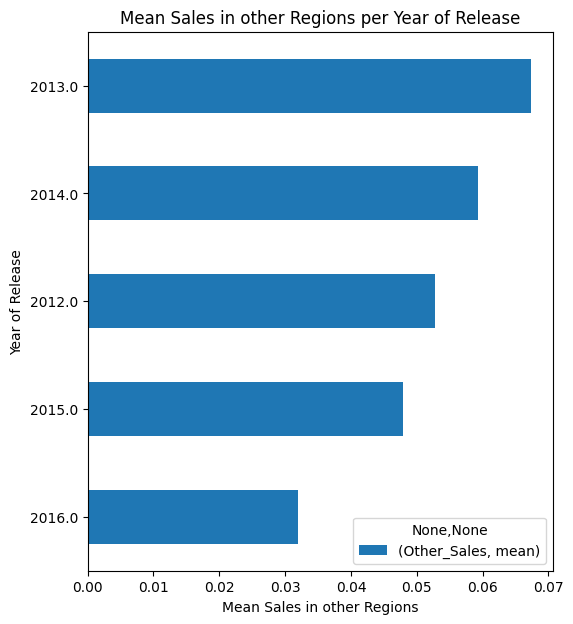

In [ ]:
year_of_release_Other_sales_mean_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'Other_Sales': ['mean']})
year_of_release_Other_sales_mean_df.sort_values(('Other_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean Sales in other Regions')
plt.ylabel('Year of Release')
plt.title('Mean Sales in other Regions per Year of Release')

Here, we can infer that the **2013, 2014, and 2012** video game genres have the highest sales on average in the rest of the world.

###By Worldwide Sales

To answer this question, the variables of interest are:
- **`Year_of_Release`**: Year of the game's release
- **`Global_Sales`**: Total worldwide sales (in millions)

Let us first group by year of then get the measure of central tendency and measure of dispersion

In [ ]:
year_of_release_Global_sales_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'Global_Sales': ['mean', 'std']})
year_of_release_Global_sales_df.sort_values(('Global_Sales', 'mean'), ascending=False)

Global_Sales          
                        mean       std
Year_of_Release                       
2013.0              0.633172  1.632471
2014.0              0.532882  1.219264
2012.0              0.519695  1.271994
2015.0              0.423546  1.083102
2016.0              0.284676  0.853970

Let us visualize the means of the Worldwide Sales across different years of release for comparison.

Text(0.5, 1.0, 'Mean Worldwide Sales per Year of Release')

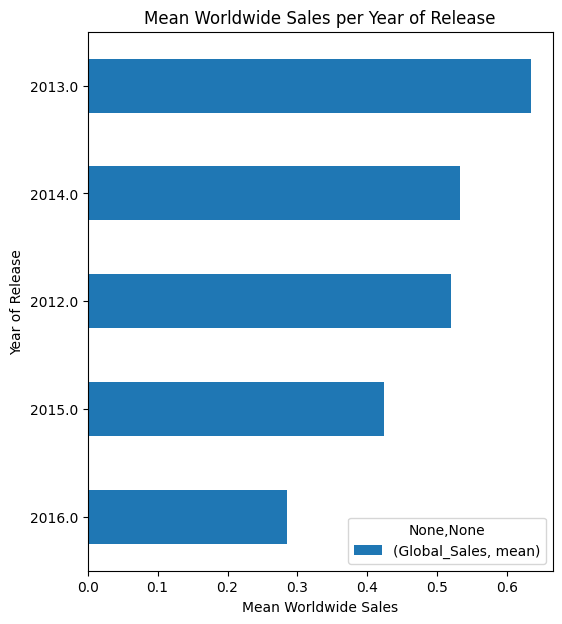

In [ ]:
year_of_release_Global_sales_mean_df = last_5_years_filtered_df.groupby('Year_of_Release').agg({'Global_Sales': ['mean']})
year_of_release_Global_sales_mean_df.sort_values(('Global_Sales', 'mean'), ascending=False).plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Mean Worldwide Sales')
plt.ylabel('Year of Release')
plt.title('Mean Worldwide Sales per Year of Release')

Here, we can infer that the **2013, 2014, and 2012** video game genres have the highest sales on average worldwide.

**Conclusion**: There is an overall trend that 2013 had the highest mean sales per year while 2016 had the lowest mean sales per year. What is also interesting is that these years consistently had the highest and lowest dispersion respectively. Additionallly, 2016 ranked second to last in number of observations with 2013 just behind it.

Let us see whether there is a reason for this **through the next Exploratory Data Analysis.**

##What were the top 20 highest selling video games in the last five years before 2017?

###By Worldwide Sales

To answer this question, the variables of interest are:
- **`Name`**: The game's name
- **`Global_Sales`**: Total worldwide sales (in millions)

First, let us group the observations by 'Name' since games have multiple observations for different platform releases.

In [ ]:
grouped_sales = last_5_years_filtered_df.groupby('Name').agg({'Global_Sales': 'sum', 'Year_of_Release' : 'first'}).reset_index()
grouped_sales

,Name,Global_Sales,Year_of_Release
0,.hack: Sekai no Mukou ni + Versus,0.03,2012.0
1,0-ji no Kane to Cinderella: Halloween Wedding,0.01,2013.0
2,1/2 Summer +,0.01,2013.0
3,12-Sai. Honto no Kimochi,0.07,2014.0
4,12-Sai. Koisuru Diary,0.06,2016.0
...,...,...,...
1880,Zumba Fitness: World Party,0.46,2013.0
1881,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,2013.0
1882,[Prototype 2],1.65,2012.0
1883,htoL#NiQ: The Firefly Diary,0.01,2014.0


Next, let us sort by 'Global_Sales' in descending order and get the top 10

In [94]:
top_20_games = grouped_sales.nlargest(20, 'Global_Sales')
top_20_games

,Name,Global_Sales,Year_of_Release
623,Grand Theft Auto V,57.75,2013.0
200,Call of Duty: Black Ops II,29.42,2012.0
201,Call of Duty: Ghosts,27.46,2013.0
199,Call of Duty: Black Ops 3,26.02,2015.0
995,Minecraft,25.69,2013.0
198,Call of Duty: Advanced Warfare,22.08,2014.0
483,FIFA 15,17.41,2014.0
482,FIFA 14,16.50,2013.0
484,FIFA 16,16.39,2015.0
487,FIFA Soccer 13,15.99,2012.0


Since this is a comparison between the total worldwide sales across games, there is no need to compute for the measure of central tendency, measure of dispersion, or measure of correlation.

Let us visualize the number of games within the top 20 per year of release.

Text(0.5, 1.0, 'Top Selling Game count per year of release')

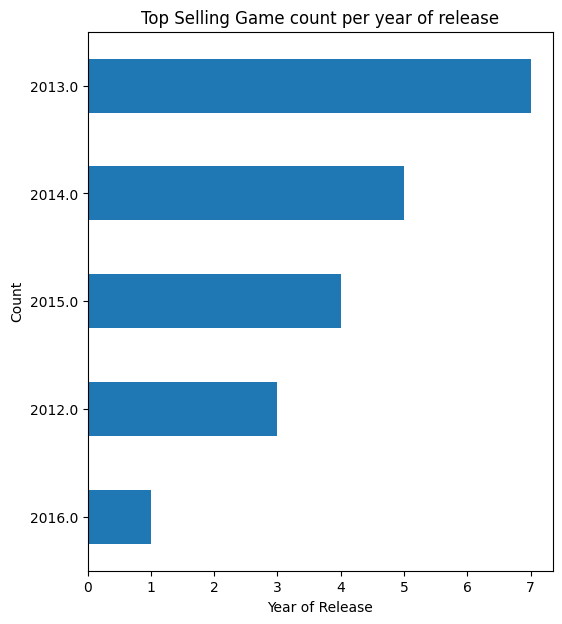

In [95]:
top_20_games_year_count = top_20_games['Year_of_Release'].value_counts()

top_20_games_year_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Top Selling Game count per year of release')

Here, we can infer that a majority of the top selling games within the last 5 years preceding 2017 were released in 2013.

# Research Question

**What are the key associations between video game attributes (genre, platform, rating) and sales in different regions (NA, EU, JP)?**

> Why focus on this question?
- Market Insight: Helps understand regional preferences to better target marketing and game development.
- Strategic Decisions: Informs where to allocate resources for marketing and development.
- Product Development: Guides what kind of games to develop based on what sells well in each region.
- Competitive Advantage: Gives a deeper understanding of different markets, which helps outperform competitors.

> What method would be used?
- We'll use association rule mining to find relationships between game attributes and sales in North America, Europe, and Japan.
